Sezgi Cobanbas 27.01.2025

As a first step of this project, need to download two simple scripts, which they are 'DBN.py' and RBM.py', from an open-source to simplify the implementation process in Pytorch and import a few Python libraries that we will use in the project.


In [1]:
def get_dbn_library():
  files = ["DBN.py", "RBM.py"]
  repository_url = "https://raw.githubusercontent.com/flavio2018/Deep-Belief-Network-pytorch/master/"
  for file in files:
    ! wget -O {file} {repository_url}{file}

In [2]:
# Capture the output of the function to avoid clutter
%%capture
get_dbn_library()

In [3]:
# Libraries
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import scipy.cluster as cluster
import sklearn.preprocessing
import torch
import torchvision as tv

from DBN import DBN


In [4]:
print(torch.cuda.is_available())
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

True
cuda


We are using Fashion MNIST datasets for the project, which consists of grayscale images of 10 different types of clothing items. This dataset includes a total of 70k smaples: 60k for training, and 10k for testing.

To normalize the pixel values, each value will be divided by 255, the max value in RGB notation, scaling them to fall within the range 0 to 1.

Then, we will prepare both the training and testing datasets for processing on a GPU device to optimizze performance during model training.




In [5]:
%%capture
fmnist_tr = tv.datasets.FashionMNIST(root="../fashion", train=True, download=True)
fmnist_te = tv.datasets.FashionMNIST(root="../fashion", train=False, download=True)

fmnist_tr.data.shape, fmnist_te.data.shape

fmnist_tr.data = fmnist_tr.data / 255
fmnist_te.data = fmnist_te.data / 255

fmnist_tr.data = fmnist_tr.data.to(device)
fmnist_te.data = fmnist_te.data.to(device)
fmnist_tr.targets = fmnist_tr.targets.to(device)
fmnist_te.targets = fmnist_te.targets.to(device)

The image shows the digit: 9


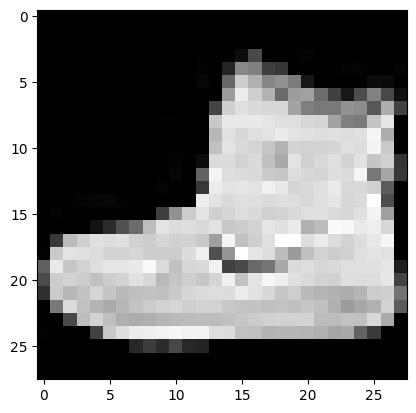

In [6]:
idx = 0
img = fmnist_tr.data[idx].cpu()
print("The image shows the digit: {}".format(fmnist_tr.targets[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

Label names represent as a number:

|0|1|2|3|4|5|6|7|8|9|
|--|--|--|--|--|--|--|--|--|--|
|Top|Trousers|Pullover|Dress|Coat|Sandal|Shirt|Sneaker|Bag|Ankle Boot|


Code above selects the first image in the Fashion MNIST training dataset. Display the image and prints the corresponding label for the image.

As can be seen from the output, it was found to be 9, that is, ankle boot.

In the section below, we can see different types of clothing, as represented in grayscale.

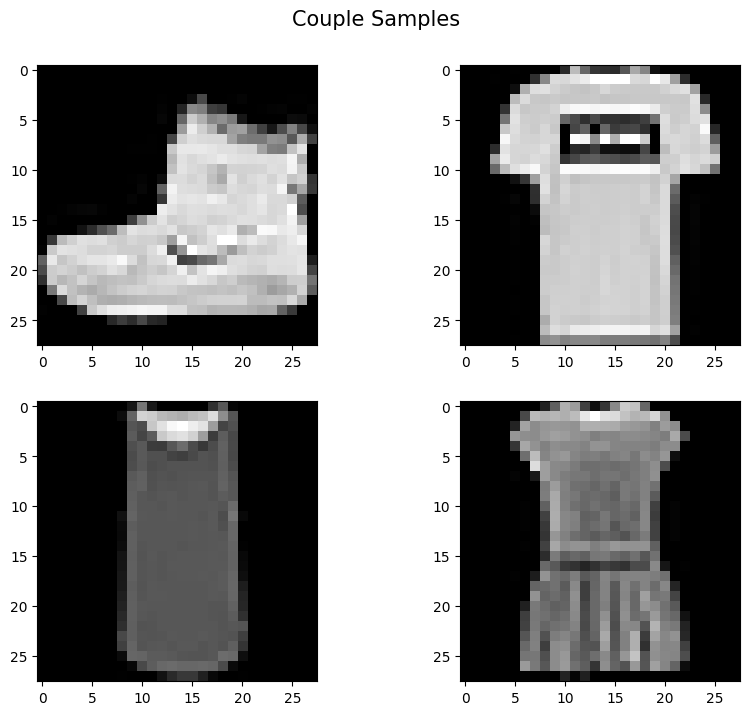

In [7]:
plt.figure(figsize=(10, 8))
plt.suptitle("Couple Samples", fontsize=15, y=0.95)

for n in range(4):
    ax = plt.subplot(2, 2, n + 1)
    ax.imshow(fmnist_tr.data[n].cpu(), cmap='gray')

In [8]:
num_epochs = 50
batch_size = 64

dbn_fmnist = DBN(visible_units=28*28,
                hidden_units=[500, 600, 700],
                learning_rate=0.05,
                k=1,
                initial_momentum=0.4,
                final_momentum=0.95,
                weight_decay=0.0001,
                learning_rate_decay=False,
                xavier_init=False,
                increase_to_cd_k=False,
                use_gpu=torch.cuda.is_available())


dbn_fmnist.train_static(
    fmnist_tr.data,
    fmnist_tr.targets,
    num_epochs,
    batch_size)

--------------------
Training RBM layer 1
|Epoch |avg_rec_err |std_rec_err  |mean_grad |std_grad  |
|10    |0.9368     |0.0575       |242.5565   |4.3104     |
|20    |0.8701     |0.0553       |228.7803   |4.3595     |
|30    |0.8520     |0.0539       |222.9411   |5.1470     |
|40    |0.8451     |0.0536       |222.9675   |4.5886     |
|50    |0.8412     |0.0532       |220.6834   |4.1472     |
--------------------
Training RBM layer 2
|Epoch |avg_rec_err |std_rec_err  |mean_grad |std_grad  |
|10    |0.4695     |0.0229       |122.4236   |2.3199     |
|20    |0.4332     |0.0199       |113.0619   |1.9564     |
|30    |0.4236     |0.0199       |110.3152   |2.0584     |
|40    |0.4201     |0.0202       |108.8842   |1.8774     |
|50    |0.4166     |0.0204       |107.7146   |1.9871     |
--------------------
Training RBM layer 3
|Epoch |avg_rec_err |std_rec_err  |mean_grad |std_grad  |
|10    |0.3843     |0.0170       |133.0746   |2.2283     |
|20    |0.3396     |0.0159       |119.2822   |2.322

In [9]:
num_epochs = 50
batch_size = 64

dbn_fmnist = DBN(visible_units=28*28,
                hidden_units=[500, 600, 700, 800],
                learning_rate=0.05,
                k=1,
                initial_momentum=0.4,
                final_momentum=0.95,
                weight_decay=0.0001,
                learning_rate_decay=False,
                xavier_init=False,
                increase_to_cd_k=False,
                use_gpu=torch.cuda.is_available())


dbn_fmnist.train_static(
    fmnist_tr.data,
    fmnist_tr.targets,
    num_epochs,
    batch_size)

--------------------
Training RBM layer 1
|Epoch |avg_rec_err |std_rec_err  |mean_grad |std_grad  |
|10    |0.9365     |0.0574       |243.9780   |4.5338     |
|20    |0.8702     |0.0557       |225.9935   |4.3920     |
|30    |0.8519     |0.0530       |223.7419   |4.1135     |
|40    |0.8429     |0.0537       |222.6225   |4.7025     |
|50    |0.8405     |0.0534       |222.1255   |4.4745     |
--------------------
Training RBM layer 2
|Epoch |avg_rec_err |std_rec_err  |mean_grad |std_grad  |
|10    |0.4738     |0.0228       |124.9809   |2.4481     |
|20    |0.4364     |0.0211       |115.1604   |1.9998     |
|30    |0.4278     |0.0198       |112.2717   |2.0042     |
|40    |0.4247     |0.0201       |111.1043   |1.9496     |
|50    |0.4220     |0.0202       |110.5188   |2.2605     |
--------------------
Training RBM layer 3
|Epoch |avg_rec_err |std_rec_err  |mean_grad |std_grad  |
|10    |0.3884     |0.0175       |134.5978   |2.5227     |
|20    |0.3450     |0.0155       |121.5893   |2.162

First we used 3 layer DBN with [500, 600, 700] neurons in each layer, respectively with 0.4 initial momentum and batch size of 64. Then we increased the layer to 4 with [500,600,700,800] neurons in each layers.

While both networks show improvements in reconstruction error and gradient behavior over time, the 4-layer network has the advantage of lower reconstruction error in the deeper layers, particularly in Layer 4.

If we look at the results, we should use 4 layer network.

Next we will create functions and each of these functions is focused on manipulating and visualizing the learned weights from a NN to help analyze and show what the network has learned.

In [10]:
def get_weights_from_layer(dbn, layer_index):
    return dbn.rbm_layers[layer_index].W.cpu().numpy()

def threshold_weights(weights, threshold=0):
    mask = abs(weights) > threshold
    return weights * mask

def apply_min_max_scaler(learned_weights):
  original_shape = learned_weights.shape
  min_max_scaler = sklearn.preprocessing.MinMaxScaler()
  min_max_scaled_learned_weights = min_max_scaler.fit_transform(learned_weights.ravel().reshape(-1,1))
  min_max_scaled_learned_weights = min_max_scaled_learned_weights.reshape(original_shape)
  return min_max_scaled_learned_weights


def plot_layer_receptive_fields(weights):
  num_subplots = 100
  n_rows_cols = int(math.sqrt(num_subplots))
  fig, axes = plt.subplots(n_rows_cols, n_rows_cols, sharex=True, sharey=True, figsize=(10, 10))
  for i in range(num_subplots):
    row = i % n_rows_cols
    col = i // n_rows_cols
    axes[row, col].imshow(weights[i,:].reshape((28, 28)), cmap=plt.cm.gray)

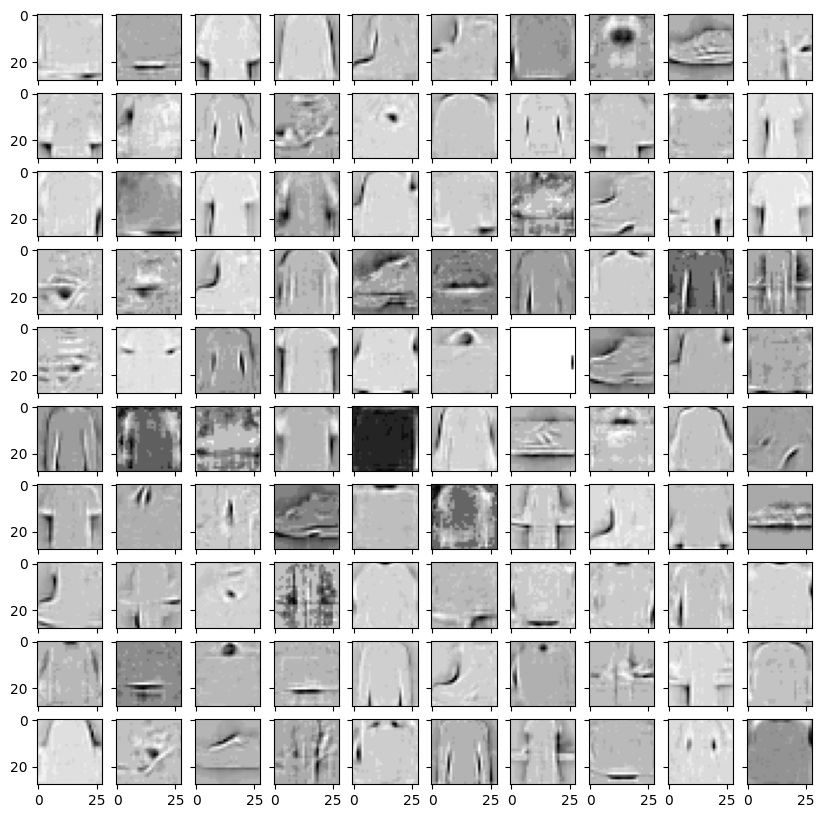

In [11]:
w_1 = get_weights_from_layer(dbn_fmnist, layer_index=0)
w_1 = threshold_weights(w_1, 0.1)
w_1 = apply_min_max_scaler(w_1)
plot_layer_receptive_fields(w_1.T)



To visualize the receptive fields, we reshape or project these weight vectors back into the 28 × 28 image dimensions. This process involves transforming the weights from one layer to the next, with each layer detecting increasingly complex features.

By reshaping the weights and projecting them through the layers, we can observe how features evolve throughout the network. This allows us to understand the hierarchical learning of patterns, from simple edges in the first layer to complex shapes in deeper layers.

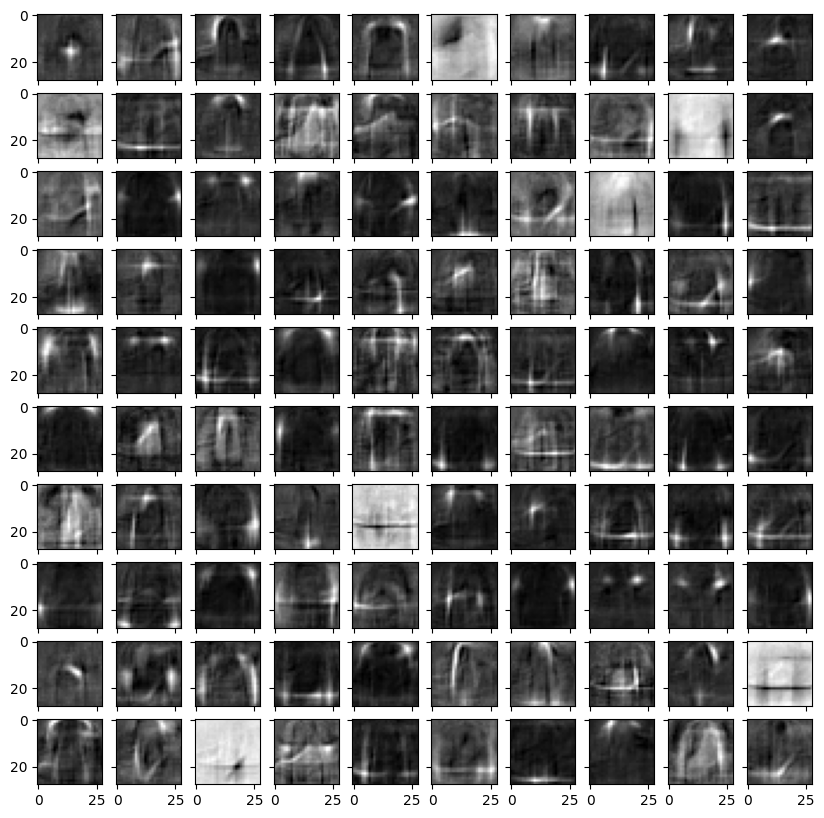

In [12]:
w1 = get_weights_from_layer(dbn_fmnist, layer_index=0)
w2 = get_weights_from_layer(dbn_fmnist, layer_index=1)

w1 = threshold_weights(w1, 0.1)
w2 = threshold_weights(w2, 0.1)

w_product = (w1 @ w2)
w_product = threshold_weights(w_product, 0.1)
w_product = apply_min_max_scaler(w_product)

plot_layer_receptive_fields(w_product.T)

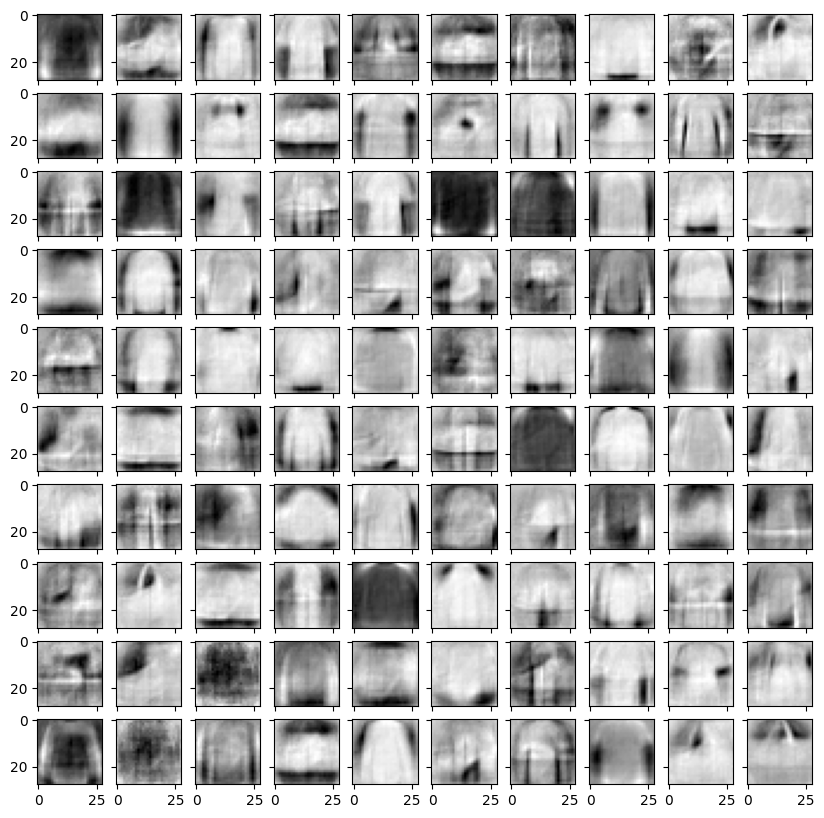

In [13]:
w1 = get_weights_from_layer(dbn_fmnist, layer_index=0)
w2 = get_weights_from_layer(dbn_fmnist, layer_index=1)
w3 = get_weights_from_layer(dbn_fmnist, layer_index=2)

w1 = threshold_weights(w1, 0.1)
w2 = threshold_weights(w2, 0.1)
w3 = threshold_weights(w3, 0.1)

w_product_12 = (w1 @ w2)
w_product_23 = (w_product_12 @ w3)
w_product_23 = threshold_weights(w_product_23, 0.1)
w_product_23 = apply_min_max_scaler(w_product_23)

plot_layer_receptive_fields(w_product_23.T)

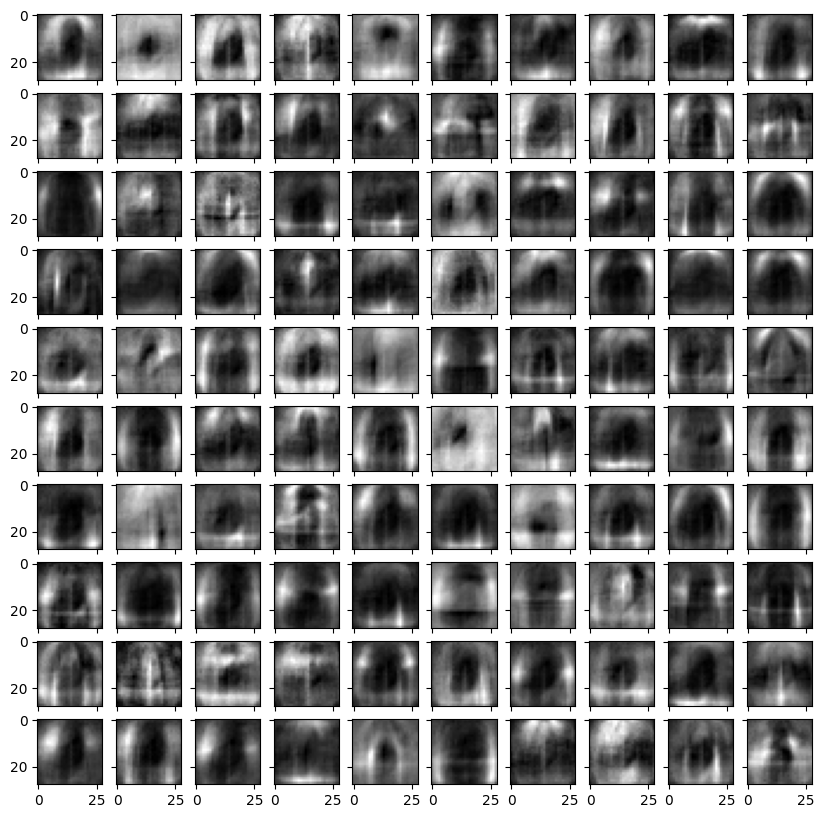

In [14]:
w1 = get_weights_from_layer(dbn_fmnist, layer_index=0)
w2 = get_weights_from_layer(dbn_fmnist, layer_index=1)
w3 = get_weights_from_layer(dbn_fmnist, layer_index=2)
w4 = get_weights_from_layer(dbn_fmnist, layer_index=3)

w1 = threshold_weights(w1, 0.1)
w2 = threshold_weights(w2, 0.1)
w3 = threshold_weights(w3, 0.1)
w4 = threshold_weights(w4, 0.1)

w_product_12 = (w1 @ w2)
w_product_23 = (w_product_12 @ w3)
w_product_34 = (w_product_23 @ w4)
w_product_34 = threshold_weights(w_product_34, 0.1)
w_product_23 = apply_min_max_scaler(w_product_34)

plot_layer_receptive_fields(w_product_34.T)



The first layer of the network focuses on detecting low-level features, such as basic lines and patterns.

The second layer builds upon these features, identifying higher-level structures like horizontal, vertical, and intersecting lines.

The third layer captures more intricate elements, including shadows and complex shapes.

Lastly, the fourth layer identifies highly abstract and sophisticated features that are harder to interpret, representing the most advanced understanding of the input data.

This hierarchical process allows the network to gradually learn and recognize increasingly complex features as it progresses through the layers.









# Clustering Internal Representations

We can also analyze the characteristics of the learned distributed representations in each layer by computing the centroid of the representations for each class.

We can assess their proximity to one another using a hierarchical clustering algorithm. This helps us understand how distinct or similar the learned representations are for different classes.

In [16]:
def get_kth_layer_repr(input, k, device):
    flattened_input = input.reshape((input.shape[0], -1)).type(torch.FloatTensor).to(device)
    hidden_repr, _ = dbn_fmnist.rbm_layers[k].to_hidden(flattened_input)
    return hidden_repr


In [17]:

hidden_repr_1 = get_kth_layer_repr(fmnist_tr.data, 0, device)
hidden_repr_2 = get_kth_layer_repr(fmnist_tr.data, 1, device)
hidden_repr_3 = get_kth_layer_repr(fmnist_tr.data, 2, device)
hidden_repr_4 = get_kth_layer_repr(fmnist_tr.data, 3, device)

In [18]:
print(hidden_repr_1.shape)

torch.Size([60000, 500])


In [19]:
def get_mask(label):
  labels = fmnist_tr.targets.cpu().numpy()
  return labels == label

def get_label_to_mean_hidd_repr(hidden_repr):
  hidden_repr_np = hidden_repr.cpu().numpy()
  return {
    label: hidden_repr_np[get_mask(label)].mean(axis=0)
    for label in range(10)
  }

def get_hidden_reprs_matrix(hidden_repr):
  label_to_mean_hidd_repr = get_label_to_mean_hidd_repr(hidden_repr)
  return np.concatenate(
    [np.expand_dims(label_to_mean_hidd_repr[label], axis=0)
    for label in range(10)])

In [20]:
mean_hidd_repr_matrix_3 = get_hidden_reprs_matrix(hidden_repr_3)

In [21]:
def plot_dendrogram(mean_repr_matrix, title=""):
  fig, ax = plt.subplots()
  linkage = cluster.hierarchy.linkage(mean_repr_matrix, method="complete")  # we run the clustering algorithm here
  dendrogram = cluster.hierarchy.dendrogram(linkage)
  ax.set_title(title)


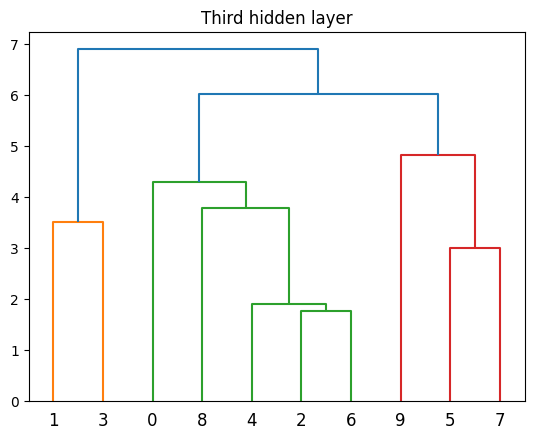

In [22]:
plot_dendrogram(mean_hidd_repr_matrix_3, "Third hidden layer")

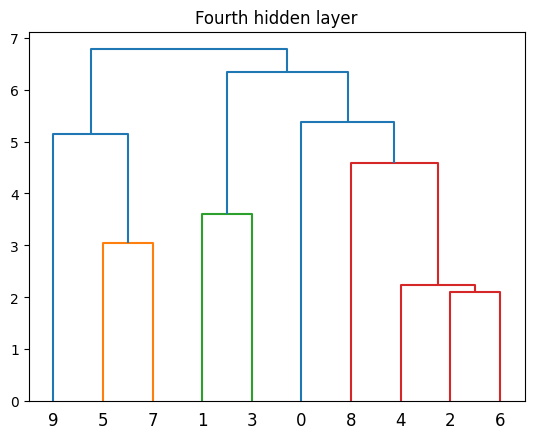

In [23]:
mean_hidd_repr_matrix_4 = get_hidden_reprs_matrix(hidden_repr_4)

plot_dendrogram(mean_hidd_repr_matrix_4, "Fourth hidden layer")

Label names represent as a number:

|0|1|2|3|4|5|6|7|8|9|
|--|--|--|--|--|--|--|--|--|--|
|Top|Trousers|Pullover|Dress|Coat|Sandal|Shirt|Sneaker|Bag|Ankle Boot|

When comparing the dendrograms of the 3-layer and 4-layer networks, we observe that the clustering patterns are quite similar. Both networks show comparable groupings of the classes based on the learned representations.

# Linear Read-Outs

Linear read-outs are a technique used to analyze distributed representations by decoding them with a simple linear model.

This model consists of 10 output neurons, each representing one of the possible classes in a classification task. The purpose of the linear read-out is to map the high-dimensional, distributed representations learned by the network to a lower-dimensional output, typically corresponding to the class labels.

In [24]:
class LinearModel(torch.nn.Module):
  def __init__(self, layer_size):
    super().__init__()
    self.linear = torch.nn.Linear(layer_size, 10)

  def forward(self, x):
    return self.linear(x)

By using separate linear classifiers for each hidden layer, we can evaluate how well each layer's representation can be decoded into the final class labels, providing insight into the hierarchical feature learning process of the DBN.

In [25]:
linear_models = []

for i in range(4):
    layer_size = dbn_fmnist.rbm_layers[i].W.shape[1]
    linear_models.append(LinearModel(layer_size).to(device))

linear1, linear2, linear3, linear4 = linear_models


for the next chapter, we are training a linear classifier on the hidden representations of the data, which are the outputs from the previous layers of the model.During the training process, the classifier is learning to map these hidden representations to the actual class labels from the Fashion MNIST dataset.

We used the cross-entropy loss function to measure the difference between the predicted labels and the true class labels and  model is trained using SG.

In [26]:
def train_linear(linear, hidden_reprs):
  optimizer = torch.optim.SGD(linear.parameters(), lr=0.05)
  loss_fn = torch.nn.CrossEntropyLoss()
  epochs = 1000

  for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = linear(hidden_reprs).squeeze()
    targets = fmnist_tr.targets.reshape(predictions.shape[0])
    loss = loss_fn(predictions.cpu(), targets.cpu())
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print("epoch : {:3d}/{}, loss = {:.4f}".format(epoch + 1, epochs, loss))

In [27]:
print("#1")
train_linear(linear1, hidden_repr_1)
print("#2")
train_linear(linear2, hidden_repr_2)
print("#3")
train_linear(linear3, hidden_repr_3)
print("#4")
train_linear(linear4, hidden_repr_4)

#1
epoch :   1/1000, loss = 2.3776


/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:825: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


epoch : 101/1000, loss = 0.9027
epoch : 201/1000, loss = 0.7107
epoch : 301/1000, loss = 0.6332
epoch : 401/1000, loss = 0.5884
epoch : 501/1000, loss = 0.5579
epoch : 601/1000, loss = 0.5354
epoch : 701/1000, loss = 0.5177
epoch : 801/1000, loss = 0.5034
epoch : 901/1000, loss = 0.4915
#2
epoch :   1/1000, loss = 2.2598
epoch : 101/1000, loss = 0.7913
epoch : 201/1000, loss = 0.6455
epoch : 301/1000, loss = 0.5844
epoch : 401/1000, loss = 0.5479
epoch : 501/1000, loss = 0.5227
epoch : 601/1000, loss = 0.5039
epoch : 701/1000, loss = 0.4891
epoch : 801/1000, loss = 0.4772
epoch : 901/1000, loss = 0.4673
#3
epoch :   1/1000, loss = 2.3079
epoch : 101/1000, loss = 0.8459
epoch : 201/1000, loss = 0.6723
epoch : 301/1000, loss = 0.6025
epoch : 401/1000, loss = 0.5620
epoch : 501/1000, loss = 0.5347
epoch : 601/1000, loss = 0.5145
epoch : 701/1000, loss = 0.4988
epoch : 801/1000, loss = 0.4862
epoch : 901/1000, loss = 0.4757
#4
epoch :   1/1000, loss = 2.3260
epoch : 101/1000, loss = 0.7785

 From the result we has above, the model shows a consistent and steady decrease in the loss and this occurs smoothly across all four layers, indicating that the model is learning effectively over time.



In [31]:
def get_kth_layer_repr(input, k, device):
    # Flatten the input and ensure it's in the right format
    flattened_input = input.reshape((input.shape[0], -1)).type(torch.FloatTensor).to(device)

    # Ensure the hidden representation size matches what the layer expects
    hidden_repr, _ = dbn_fmnist.rbm_layers[k].to_hidden(flattened_input)

    return hidden_repr


In [32]:
hidden_repr_1_test = get_kth_layer_repr(fmnist_te.data, 0, device)
hidden_repr_2_test = get_kth_layer_repr(hidden_repr_1_test, 1, device)
hidden_repr_3_test = get_kth_layer_repr(hidden_repr_2_test, 2, device)
hidden_repr_4_test = get_kth_layer_repr(hidden_repr_3_test, 3, device)

predictions_test1 = linear1(hidden_repr_1_test)
predictions_test2 = linear2(hidden_repr_2_test)
predictions_test3 = linear3(hidden_repr_3_test)
predictions_test4 = linear4(hidden_repr_4_test)

In [33]:
def compute_accuracy(predictions_test, targets):
  predictions_indices = predictions_test.max(axis=1).indices
  accuracy = (predictions_indices == targets).sum() / len(targets)
  return accuracy.item()

print("Accuracy of Prediction Test 1:")
print(compute_accuracy(predictions_test1, fmnist_te.targets))
print("   ")
print("Accuracy of Prediction Test 2:")
print(compute_accuracy(predictions_test2, fmnist_te.targets))
print("   ")
print("Accuracy of Prediction Test 3:")
print(compute_accuracy(predictions_test3, fmnist_te.targets))
print("   ")
print("Accuracy of Prediction Test 4:")
print(compute_accuracy(predictions_test4, fmnist_te.targets))

Accuracy of Prediction Test 1:
0.8283999562263489
   
Accuracy of Prediction Test 2:
0.8337000012397766
   
Accuracy of Prediction Test 3:
0.8321999907493591
   
Accuracy of Prediction Test 4:
0.833299994468689


The output shows the accuracy of the predictions for each test, where each test corresponds to a different hidden layer's representation being fed into a linear classifier. The accuracies range between 82.8% and 83.3%, indicating relatively consistent performance across the different layers.

Test 1's accuracy is 82.8%, Test 2's is slightly higher at 83.3%, and Test 3 shows a similar result with 83.2%. Test 4 also achieves an accuracy of 83.3%. These results suggest that while the accuracy improves slightly from one layer to the next, the overall differences are minimal.



# Comparison With a Feed Forward Neural Network


In this section, we train a simple feed-forward neural network (FFNN) with the same structure as the Deep Belief Network (DBN) to compare the performance of a traditional non-linear model with our generative model for supervised classification.


In [34]:
class Feedforward(torch.nn.Module):
  def __init__(self, first_hidden_layer_size, second_hidden_layer_size,
               third_hidden_layer_size, fourth_hidden_layer_size):
    super().__init__()
    self.first_hidden = torch.nn.Linear(784, first_hidden_layer_size)
    self.second_hidden = torch.nn.Linear(first_hidden_layer_size, second_hidden_layer_size)
    self.third_hidden = torch.nn.Linear(second_hidden_layer_size, third_hidden_layer_size)
    self.fourth_hidden = torch.nn.Linear(third_hidden_layer_size, fourth_hidden_layer_size)
    self.output = torch.nn.Linear(fourth_hidden_layer_size, 10)

  def forward(self, input):
    relu = torch.nn.ReLU()
    first_hidden_repr = relu(self.first_hidden(input))
    second_hidden_repr = relu(self.second_hidden(first_hidden_repr))
    third_hidden_repr = relu(self.third_hidden(second_hidden_repr))
    fourth_hidden_repr = relu(self.fourth_hidden(third_hidden_repr))
    output = self.output(fourth_hidden_repr)
    return output

In [35]:
def train_supervised(network, input_data, epochs=1500):
  optimizer = torch.optim.SGD(network.parameters(), lr=0.05)
  loss_fn = torch.nn.CrossEntropyLoss()

  for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = network(input_data).squeeze()
    targets = fmnist_tr.targets.reshape(predictions.shape[0])
    loss = loss_fn(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print("epoch : {:3d}/{}, loss = {:.4f}".format(epoch + 1, epochs, loss))

In [36]:
ffnn = Feedforward(500, 600, 700, 800).to(device)

In [39]:
train_supervised(ffnn, fmnist_tr.data.reshape((60000, 784)), 1500)

epoch :   1/1500, loss = 0.5071
epoch : 101/1500, loss = 0.4882
epoch : 201/1500, loss = 0.4753
epoch : 301/1500, loss = 0.4677
epoch : 401/1500, loss = 0.4783
epoch : 501/1500, loss = 0.4443
epoch : 601/1500, loss = 0.4264
epoch : 701/1500, loss = 0.4393
epoch : 801/1500, loss = 0.4116
epoch : 901/1500, loss = 0.4157
epoch : 1001/1500, loss = 0.3993
epoch : 1101/1500, loss = 0.3943
epoch : 1201/1500, loss = 0.3894
epoch : 1301/1500, loss = 0.3801
epoch : 1401/1500, loss = 0.3796


In [40]:
predictions_ffnn = ffnn(fmnist_te.data.reshape((10000, 784)))
print(compute_accuracy(predictions_ffnn, fmnist_te.targets))

0.8537999987602234


In [41]:
def train_supervised(network, input_data, epochs=2000):
  optimizer = torch.optim.SGD(network.parameters(), lr=0.05)
  loss_fn = torch.nn.CrossEntropyLoss()

  for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = network(input_data).squeeze()
    targets = fmnist_tr.targets.reshape(predictions.shape[0])
    loss = loss_fn(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print("epoch : {:3d}/{}, loss = {:.4f}".format(epoch + 1, epochs, loss))

In [42]:
train_supervised(ffnn, fmnist_tr.data.reshape((60000, 784)), 1670)

epoch :   1/1670, loss = 0.3673
epoch : 101/1670, loss = 0.3730
epoch : 201/1670, loss = 0.3621
epoch : 301/1670, loss = 0.3533
epoch : 401/1670, loss = 0.3429
epoch : 501/1670, loss = 0.3698
epoch : 601/1670, loss = 0.3374
epoch : 701/1670, loss = 0.3597
epoch : 801/1670, loss = 0.3363
epoch : 901/1670, loss = 0.3281
epoch : 1001/1670, loss = 0.3177
epoch : 1101/1670, loss = 0.3209
epoch : 1201/1670, loss = 0.3130
epoch : 1301/1670, loss = 0.3291
epoch : 1401/1670, loss = 0.3365
epoch : 1501/1670, loss = 0.3215
epoch : 1601/1670, loss = 0.3078


In [43]:
predictions_ffnn = ffnn(fmnist_te.data.reshape((10000, 784)))
print(compute_accuracy(predictions_ffnn, fmnist_te.targets))

0.8684999942779541


The output accuracy of approximately 86.85% after training the feedforward neural network (FFNN) on the Fashion MNIST dataset represents how well the model has learned to classify the images in the test set based on the features it learned during training.

To get this result, we used 2000 epochs on trai supervised function but 1670 epoch on learning to get predictions.

If we compare the accuracies, the accuracies of our model layers, around 0.84 for four of them, are less than feed-forward model accuracy.



In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

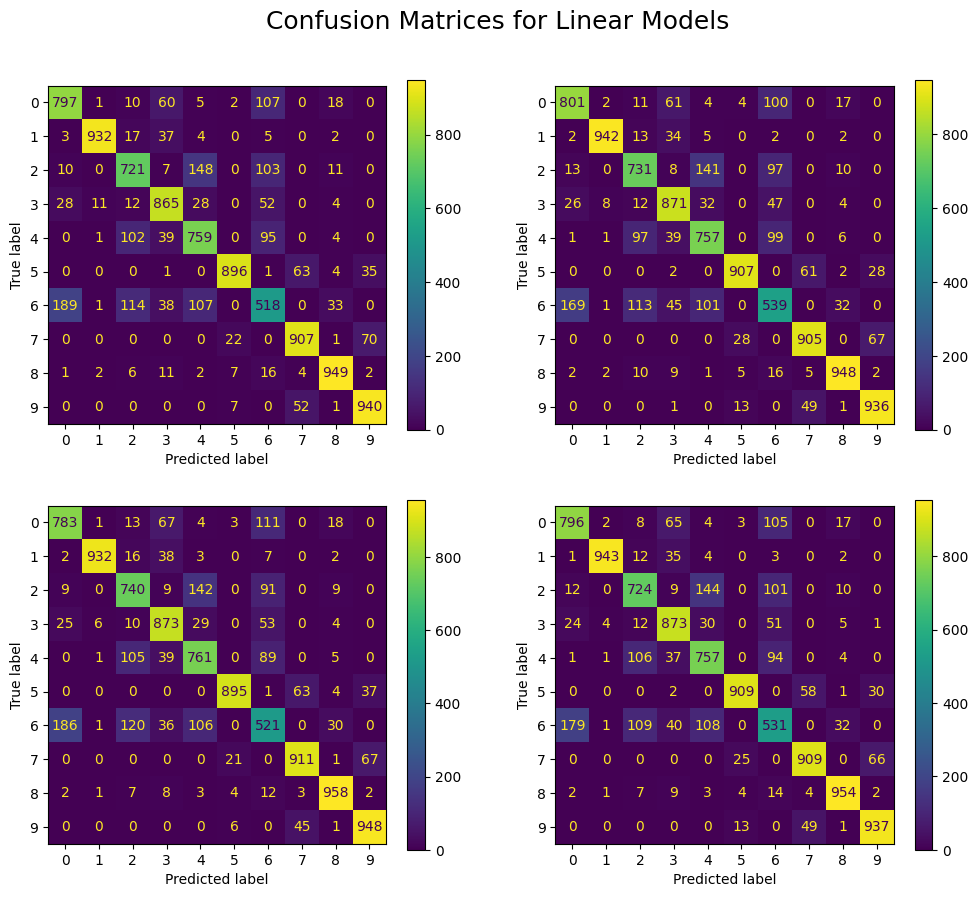

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.suptitle("Confusion Matrices for Linear Models", fontsize=18, y=0.95)

prediction_indices_1 = predictions_test1.max(axis=1).indices
prediction_indices_2 = predictions_test2.max(axis=1).indices
prediction_indices_3 = predictions_test3.max(axis=1).indices
prediction_indices_4 = predictions_test4.max(axis=1).indices

cm1 = confusion_matrix(fmnist_te.targets.cpu(), prediction_indices_1.cpu())
cm2 = confusion_matrix(fmnist_te.targets.cpu(), prediction_indices_2.cpu())
cm3 = confusion_matrix(fmnist_te.targets.cpu(), prediction_indices_3.cpu())
cm4 = confusion_matrix(fmnist_te.targets.cpu(), prediction_indices_4.cpu())

ConfusionMatrixDisplay(cm1).plot(ax=axes[0, 0])
ConfusionMatrixDisplay(cm2).plot(ax=axes[0, 1])
ConfusionMatrixDisplay(cm3).plot(ax=axes[1, 0])
ConfusionMatrixDisplay(cm4).plot(ax=axes[1, 1])

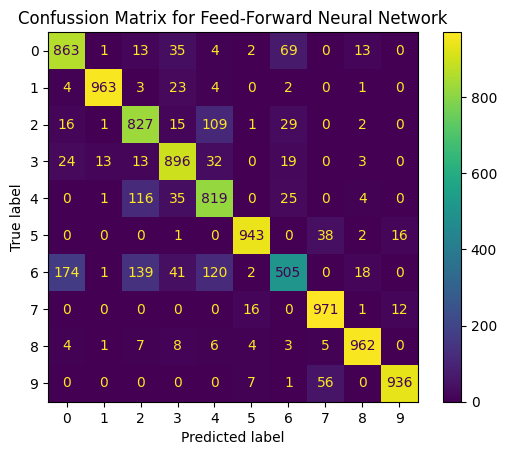

In [46]:
prediction_indices_ffnn = predictions_ffnn.max(axis=1).indices
cm_ffnn = confusion_matrix(fmnist_te.targets.cpu(), prediction_indices_ffnn.detach().cpu())
disp = ConfusionMatrixDisplay(cm_ffnn)
disp.plot()
plt.title("Confussion Matrix for Feed-Forward Neural Network")
plt.show()


-
It is evident that most models tend to confuse class 6 (shirts) with class 0 (T-shirts), class 2 (pullovers), and class 4 (coats) due to their similar visual features.

- Models also frequently confuse class 2 (pullovers) with class 4 (coats) andd class 6 (shirts)

- Those assumptions are not surprising given their visual similarity. These errors are understandable, as the items share overlapping features.

# Robustness To Noise

In this section, we will assess the robustness to noise of the representations learned by both the Deep Belief Network (DBN) and the feed-forward neural network (FFNN) by injecting noise into the input images. The purpose is to evaluate how well each model can maintain its classification accuracy when the sensory signal is perturbed.

We will construct a psychometric curve to visualize the relationship between the noise level and the accuracy. The curve will display the decrease in accuracy as noise is added, providing insight into the models' ability to remain robust under noisy conditions.


In [47]:
def inject_noise(fmnist_data, noise_level):
  fmnist_data_noise =  fmnist_data.to(device) + ((noise_level ** 0.5) * torch.randn((10000, 28, 28))).to(device)
  return fmnist_data_noise

We can see a example of noisy image we create and the original image from Fashion MNIST dataset below.

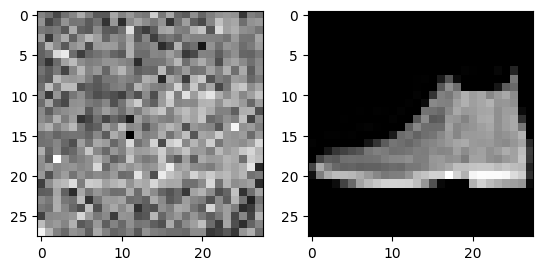

In [69]:
noise_level = 0.55
fmnist_test_with_noise = inject_noise(fmnist_te.data, noise_level)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(fmnist_test_with_noise[0].reshape(28, 28).cpu(), cmap="gray")
axes[1].imshow(fmnist_te.data[0].reshape(28, 28).cpu(), cmap="gray")

In [70]:
def get_accuracy_values_at_noise_level(noise_level):

  fmnist_test_with_noise = inject_noise(fmnist_te.data, noise_level)

  hidden_repr_1_noisy = get_kth_layer_repr(fmnist_test_with_noise, 0, device)
  hidden_repr_2_noisy = get_kth_layer_repr(hidden_repr_1_noisy, 1, device)
  hidden_repr_3_noisy = get_kth_layer_repr(hidden_repr_2_noisy, 2, device)
  hidden_repr_4_noisy = get_kth_layer_repr(hidden_repr_3_noisy, 3, device)

  predictions_first_hidden_noisy = linear1(hidden_repr_1_noisy)
  predictions_second_hidden_noisy = linear2(hidden_repr_2_noisy)
  predictions_third_hidden_noisy = linear3(hidden_repr_3_noisy)
  predictions_fourth_hidden_noisy = linear4(hidden_repr_4_noisy)

  accuracy_first_hidden = compute_accuracy(predictions_first_hidden_noisy, fmnist_te.targets)
  accuracy_second_hidden = compute_accuracy(predictions_second_hidden_noisy, fmnist_te.targets)
  accuracy_third_hidden = compute_accuracy(predictions_third_hidden_noisy, fmnist_te.targets)
  accuracy_fourth_hidden = compute_accuracy(predictions_fourth_hidden_noisy, fmnist_te.targets)

  predictions_ffnn = ffnn(fmnist_test_with_noise.data.reshape((10000, 784)))
  accuracy_ffnn = compute_accuracy(predictions_ffnn, fmnist_te.targets)

  return accuracy_first_hidden, accuracy_second_hidden, accuracy_third_hidden, accuracy_fourth_hidden, accuracy_ffnn

In [71]:
acc = get_accuracy_values_at_noise_level(0.2);
print("Accuracy of H1 read-out: %.3f" % acc[0])
print("Accuracy of H2 read-out: %.3f" % acc[1])
print("Accuracy of H3 read-out: %.3f" % acc[2])
print("Accuracy of H4 read-out : %.3f" % acc[3])
print("Accuracy of FF network : %.3f" % acc[4])

Accuracy of H1 read-out: 0.774
Accuracy of H2 read-out: 0.791
Accuracy of H3 read-out: 0.797
Accuracy of H4 read-out : 0.802
Accuracy of FF network : 0.720


As we can see, the accuracies of each layer and the FFNN model are slightly declining.

The accuracy of the DBN's hidden layer read-outs increases slightly, with H4 achieving the highest accuracy of 0.802, compared to the FFNN's accuracy of 0.720. This suggests that the DBN's deeper layers provide more effective representations for classification. To assess the impact of noise on these models, we will plot a psychometric curve to visualize how accuracy declines with increasing noise levels.

We will create the psychometric curve to visualize this better.

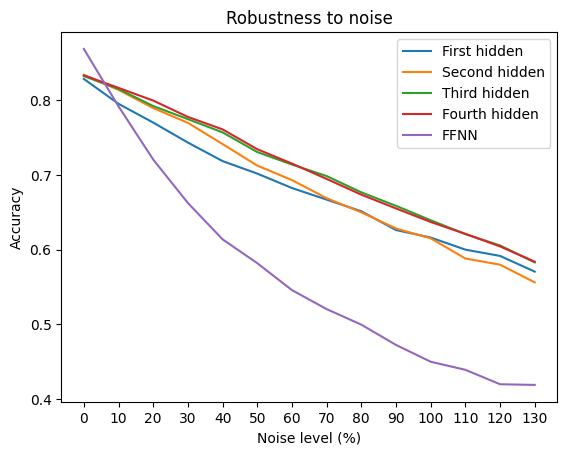

In [72]:
def plot_noise_robustness_curves(noise_levels):
  accuracy_values_first_hidden = []
  accuracy_values_second_hidden = []
  accuracy_values_third_hidden = []
  accuracy_values_fourth_hidden = []
  accuracy_values_ffnn = []

  for noise_level in noise_levels:
    acc = get_accuracy_values_at_noise_level(noise_level)
    accuracy_values_first_hidden.append(acc[0])
    accuracy_values_second_hidden.append(acc[1])
    accuracy_values_third_hidden.append(acc[2])
    accuracy_values_fourth_hidden.append(acc[3])
    accuracy_values_ffnn.append(acc[4])

  fig, ax = plt.subplots()
  ax.plot(range(len(noise_levels)), accuracy_values_first_hidden)
  ax.plot(range(len(noise_levels)), accuracy_values_second_hidden)
  ax.plot(range(len(noise_levels)), accuracy_values_third_hidden)
  ax.plot(range(len(noise_levels)), accuracy_values_fourth_hidden)
  ax.plot(range(len(noise_levels)), accuracy_values_ffnn)

  ax.set_title("Robustness to noise")
  ax.set_xlabel("Noise level (%)")
  ax.set_ylabel("Accuracy")
  plt.xticks(range(len(noise_levels)), [int(l*100) for l in noise_levels])
  plt.legend(["First hidden", "Second hidden", "Third hidden", "Fourth hidden", "FFNN"])



noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
plot_noise_robustness_curves(noise_levels)

# Perturbing The Models With Adversarial Attacks



## Fast Gradient Sign Method

Given a neural network model with parameters 𝑤 and a loss function J(𝑤,x,y) that depends on the model's parameters w, input x, and target output y, the adversial perturbation η  can be computed as:

$η = x + \epsilon \cdot \text{sign}(\nabla_{x} J(w, x, y))$

where:
*  $\epsilon$ is a small scalar value that controls the magnitude of the perturbation,

* $\nabla_{x} J(w, x, y)$ is the gradient of the loss function with respect to the input x.

* $\text{sign}$  denotes the element-wise sign of the gradient, producing a perturbation in the direction of the gradient's sign,

The perbuted input, $\tilde{x}$ , is then given by:

$\tilde{x} = x + \epsilon \cdot \text{sign}(\nabla_{x} J(w, x, y))$

The purpose of Fast Gradient Sign Method is to create adversarial examples that are perceptually indistinguishable from  the original input, yet cause the model to output incorrect predictions. The perturbation is designed to make a small change to the input that exploits the model's weaknesses, without being noticable to homan observers.







In [73]:
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

## Adversarial Samples

We aim to design a integrated architecture that combines a Deep Belief Network (DBN) with readout layers, enabling that computation of the gradşent of the loss function (for a classification task) wiith respect tot he input data being processed.  

In [74]:
class DBNWithReadOut(torch.nn.Module):
    def __init__(self, dbn_fmnist, readouts, readout_level=0):
        super().__init__()
        self.readouts = readouts
        self.dbn_fmnist = dbn_fmnist
        self._require_grad()
        self.readout_level = readout_level

    def _require_grad(self):
      for rbm in self.dbn_fmnist.rbm_layers:
        rbm.W.requires_grad_()
        rbm.h_bias.requires_grad_()

    def forward(self, image):
      p_v = image
      hidden_states = []
      for rbm in self.dbn_fmnist.rbm_layers:
        p_v = p_v.view((p_v.shape[0], -1))
        p_v, v = rbm(p_v)
        hidden_states.append(p_v)
      return self.readouts[self.readout_level].forward(hidden_states[self.readout_level])


dbn_with_readout = DBNWithReadOut(dbn_fmnist,
                                  [linear1, linear2, linear3, linear4],
                                  readout_level=3)




Let's see with 1 and 5 sample from the test set, and what an adversiarial sample looks like.

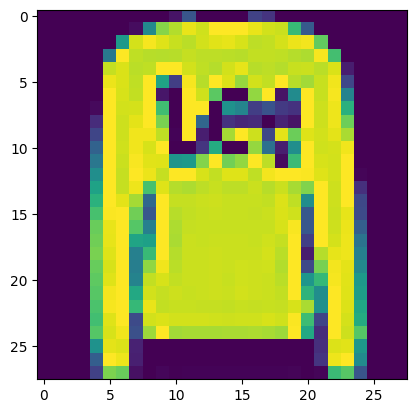

In [78]:
test_sample_idx = 1
test_image = fmnist_te.data[test_sample_idx].reshape(1, 784)
__ = plt.imshow(test_image.reshape(28,28).to('cpu'))

In [79]:
attacked_model = dbn_with_readout
test_image.requires_grad_()
model_outputs = attacked_model(test_image)
prediction = torch.argmax(model_outputs)
print(f"The prediction of the model for this clean sample is {prediction}.")

The prediction of the model for this clean sample is 2.


The model accurately classified the image as class 2, which corresponds to a pullover.

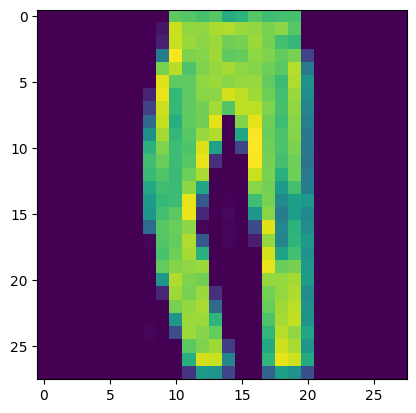

In [80]:
test_sample_idx = 5
test_image = fmnist_te.data[test_sample_idx].reshape(1, 784)
__ = plt.imshow(test_image.reshape(28,28).to('cpu'))

In [81]:
attacked_model = dbn_with_readout
test_image.requires_grad_()
model_outputs = attacked_model(test_image)
prediction = torch.argmax(model_outputs)
print(f"The prediction of the model for this clean sample is {prediction}.")

The prediction of the model for this clean sample is 1.


The model accurately classified the image as class 1, which corresponds to a trouseres.

In [92]:
epsilon = 0.25
test_image_label = fmnist_te.targets[test_sample_idx].unsqueeze(0)
loss_value = torch.nn.functional.cross_entropy(model_outputs, test_image_label)
attacked_model.zero_grad()
loss_value.backward(retain_graph=True)
image_grad = test_image.grad.data

perturbed_image = fgsm_attack(test_image, epsilon, image_grad)

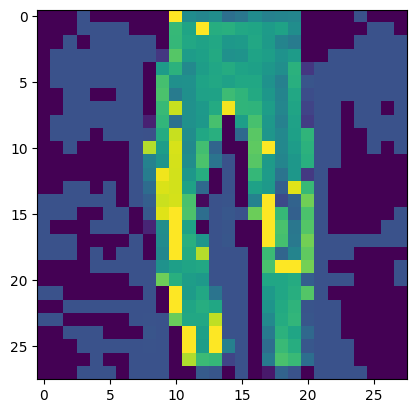

In [93]:
_ = plt.imshow(perturbed_image.cpu().detach().numpy().reshape(28, 28))

In [94]:
model_outputs = attacked_model(perturbed_image.view((perturbed_image.shape[0], -1)))
print(f"The prediction of the model for the perturbed sample is {torch.argmax(model_outputs)}.")

The prediction of the model for the perturbed sample is 0.


As we can see after perturbing the image, the model misclassified it as class 0 which is seen as top.

## Resisting To Adversarial Attacks

Resisting adversarial attacks involves enhancing a model's robustness to small, intentional changes in the input that are designed to mislead the system.

The goal is to ensure the model maintains accurate performance, even when faced with inputs that have been subtly altered to confuse it.

Techniques like adversarial training, where the model is exposed to these modified inputs during training, or input preprocessing to identify and handle suspicious alterations, are used to improve resistance. This helps make the model more reliable and less vulnerable to manipulations.

In [95]:
from tqdm.notebook import tqdm
import torch.nn.functional as functional

def test_robustness_to_attack(model, device, test_loader, epsilon, num_steps=0, verbose=True):
    correct = 0
    print_reconstruction = num_steps > 0
    for data, target in tqdm(test_loader):
        data, target = data.to(device), target.to(device)
        data = data.reshape(-1, 784)
        data.requires_grad = True
        output = model.forward(data)
        init_pred = torch.argmax(output)

        if (print_reconstruction and verbose):
          print("\nHere's the original sample:\n")
          plt.imshow(data[0].detach().to('cpu').numpy().reshape(28,28))
          plt.show()

        loss = functional.nll_loss(output, target)
        model.zero_grad()
        loss.backward()
        data_grad = data.grad.data
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        if (print_reconstruction and verbose):
            print("\nHere's a perturbed sample:\n")
            plt.imshow(perturbed_data[0].detach().to('cpu').numpy().reshape(28,28))
            plt.show()

        if num_steps > 0:
            for __ in range(0, num_steps):
                perturbed_data, __ = model.dbn_fmnist.reconstruct(perturbed_data)
            if (print_reconstruction and verbose):
                print(f"\nHere's what a {num_steps}-steps reconstructed sample looks like:\n")
                plt.imshow(perturbed_data[0].detach().to('cpu').numpy().reshape(28,28))
                plt.show()
                print_reconstruction = False

        output = model(perturbed_data)
        final_pred = output.max(1, keepdim=True)[1]
        final_pred = output.argmax(-1)
        correct += (final_pred == target).sum()

    final_acc = correct/float(len(test_loader.sampler))
    print("\nEpsilon: {}\nTest Accuracy: {:.2f}%\n".format(epsilon, final_acc*100))

    return final_acc.item()

In [96]:
test_loader = torch.utils.data.DataLoader(
    tv.datasets.FashionMNIST('data/', train=False, download=True, transform=tv.transforms.Compose([tv.transforms.ToTensor()])),
    batch_size=100, shuffle=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.4MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 170kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.23MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 18.9MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw


Measure the accuracy score of the Feed-Forward Neural Network model.

In [116]:
final_acc = test_robustness_to_attack(ffnn, device,
                                      test_loader, epsilon=0.2,
                                      num_steps=0)

  0%|          | 0/100 [00:00<?, ?it/s]


Epsilon: 0.2
Test Accuracy: 0.29%


 Compare the result above with the read-out trained on the hidden representations of the DBN.

In [112]:
final_acc_dbn = test_robustness_to_attack(dbn_with_readout, device,
                                      test_loader, epsilon=0.2,
                                      num_steps=0)

  0%|          | 0/100 [00:00<?, ?it/s]


Epsilon: 0.2
Test Accuracy: 18.81%


Compared to FFNN, our DBN does a pretty good job.

There's a difference of 18% more or less between their accuracies.

Now let's test one-step top-down reconstruction of the sample to see if it improves the result.

  0%|          | 0/100 [00:00<?, ?it/s]


Here's the original sample:


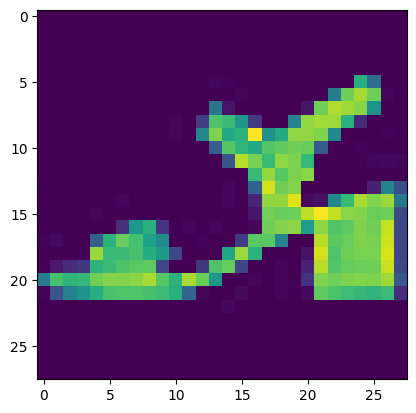


Here's a perturbed sample:


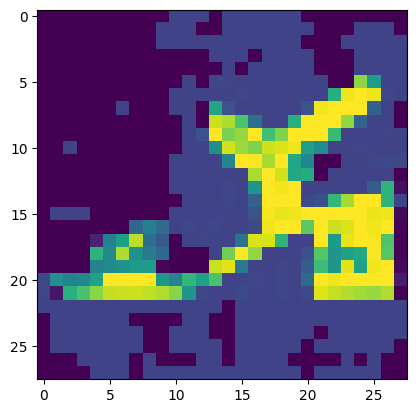


Here's what a 1-steps reconstructed sample looks like:


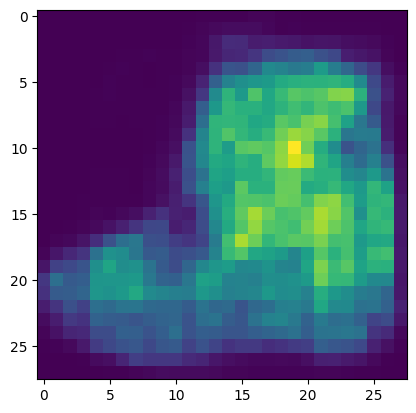


Epsilon: 0.2
Test Accuracy: 16.98%


In [117]:
final_temp_acc = test_robustness_to_attack(dbn_with_readout, device,
                                      test_loader, epsilon=0.2,
                                      num_steps=1)


With an epsilon of 0.2, the test accuracy drops to 16.98%, indicating that the model is highly vulnerable to adversarial attacks at this level of perturbation. This suggests that the adversarial noise significantly affects the model's ability to classify correctly.

## Effect of Noise Parameter

Let's compare the robustness of each model to adversarial attacks of different level.


In [118]:
epsilon_values = [0, 0.05, 0.10, 0.15, 0.20, 0.25]

def test_epsilon_values_effect(model, n_steps):
  accuracies = list()

  for eps in epsilon_values:
      acc = test_robustness_to_attack(model, device, test_loader, eps, num_steps=n_steps, verbose=False)
      accuracies.append(acc)

  return accuracies

In [119]:
%%capture
accuracies_ffnn = test_epsilon_values_effect(ffnn, n_steps=0)
accuracies_dbn_0 = test_epsilon_values_effect(dbn_with_readout, n_steps=0)
accuracies_dbn_1 = test_epsilon_values_effect(dbn_with_readout, n_steps=1)

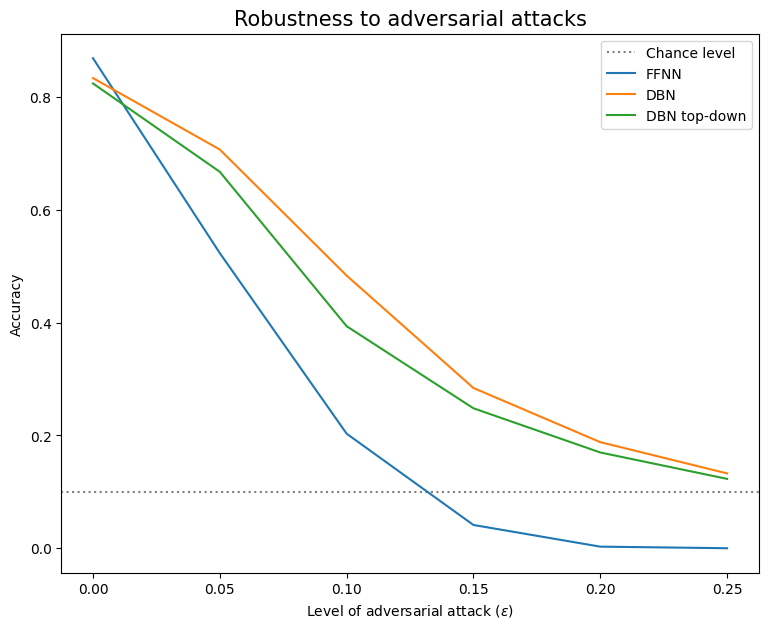

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7), sharey=True)

__ = ax.axhline(0.1, color='gray', linestyle=':')
__ = ax.plot(epsilon_values, accuracies_ffnn)
__ = ax.plot(epsilon_values, accuracies_dbn_0)
__ = ax.plot(epsilon_values, accuracies_dbn_1)
__ = ax.set_xlabel("Level of adversarial attack ($\epsilon$)")
__ = ax.set_ylabel("Accuracy")
__ = ax.set_title("Robustness to adversarial attacks", {'fontsize': 15})
__ = ax.legend(["Chance level", "FFNN", "DBN", "DBN top-down"])

## Using Adversarial Training As a Way of Defending Against  Adversarial Attacks


Training a deep model using adversarial samples can improve its robustness to adversarial attacks. By incorporating these samples during training, the model learns to better resist small perturbations that could otherwise lead to incorrect predictions.

To ensure a clean setup, we need to download the dataset again.



In [121]:
fmnist_train = tv.datasets.FashionMNIST("/data_adv", train=True, download=True, transform=tv.transforms.ToTensor())
fmnist_test = tv.datasets.FashionMNIST("/data_adv", train=False, download=True, transform=tv.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(fmnist_train, batch_size = 64, shuffle=True)
test_loader = torch.utils.data.DataLoader(fmnist_test, batch_size = 64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:03<00:00, 7.84MB/s]


Extracting /data_adv/FashionMNIST/raw/train-images-idx3-ubyte.gz to /data_adv/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 176kB/s]


Extracting /data_adv/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /data_adv/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.20MB/s]


Extracting /data_adv/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /data_adv/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.71MB/s]

Extracting /data_adv/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /data_adv/FashionMNIST/raw


This is a simple CNN model for classifying images. It has 4 convolutional layers that help extract important features from the input images. After the convolution layers, the output is flattened and passed through two fully connected layers.

The final output layer has 10 neurons, each representing a different class for the classification task.

The model uses ReLU activations to introduce non-linearities after each convolutional layer.

In [122]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)

model_cnn = torch.nn.Sequential(torch.nn.Conv2d(1, 32, 3, padding=1), torch.nn.ReLU(),
                          torch.nn.Conv2d(32, 32, 3, padding=1, stride=2), torch.nn.ReLU(),
                          torch.nn.Conv2d(32, 64, 3, padding=1), torch.nn.ReLU(),
                          torch.nn.Conv2d(64, 64, 3, padding=1, stride=2), torch.nn.ReLU(),
                          Flatten(),
                          torch.nn.Linear(7*7*64, 100), torch.nn.ReLU(),
                          torch.nn.Linear(100, 10)).to(device)


def fgsm(model, X, y, epsilon=0.1):
    delta = torch.zeros_like(X, requires_grad=True)
    loss = torch.nn.CrossEntropyLoss()(model(X + delta), y)
    loss.backward()
    return epsilon * delta.grad.detach().sign()

In [123]:
def epoch(loader, model, opt=None):
    """Standard training/evaluation epoch over the dataset"""
    total_loss, total_err = 0.,0.
    for X, y in loader:
        X, y = X.to(device), y.to(device)
        yp = model(X)
        loss = torch.nn.CrossEntropyLoss()(yp,y)
        if opt:
            opt.zero_grad()
            loss.backward()
            opt.step()

        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_err / len(loader.dataset), total_loss / len(loader.dataset)

In [124]:
def epoch_adversarial(loader, model, attack, opt=None, **kwargs):
    """Adversarial training/evaluation epoch over the dataset"""
    total_loss, total_err = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        delta = attack(model, X, y, **kwargs)
        yp = model(X+delta)
        loss = torch.nn.CrossEntropyLoss()(yp,y)
        if opt:
            opt.zero_grad()
            loss.backward()
            opt.step()

        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_err / len(loader.dataset), total_loss / len(loader.dataset)

In [125]:
optimizer = torch.optim.SGD(model_cnn.parameters(), lr=1e-1)
for t in range(10):
    train_err, train_loss = epoch(train_loader, model_cnn, optimizer)
    test_err, test_loss = epoch(test_loader, model_cnn)
    adv_err, adv_loss = epoch_adversarial(test_loader, model_cnn, fgsm)
    if t == 4:
        for param_group in optimizer.param_groups:
            param_group["lr"] = 1e-2
    print(*("{:.6f}".format(i) for i in (train_err, test_err, adv_err)), sep="\t")

0.248067	0.168000	0.906500
0.132200	0.137600	0.933800
0.112333	0.126500	0.982400
0.101450	0.118200	0.980300
0.092767	0.115000	0.989300
0.074150	0.095700	0.978800
0.070883	0.095100	0.969200
0.069100	0.095600	0.962600
0.068033	0.094100	0.955300
0.066067	0.093300	0.955600


The error scores indicate that the CNN model trained on a clean dataset performs quite well on unperturbed images, with training and testing errors of 0.06 and 0.09, respectively.

However, when the model is evaluated on adversarial samples, the error increases substantially, rising from 0.88 to 0.93. This highlights the model's vulnerability to adversarial attacks, causing a noticeable drop in performance as it struggles to correctly classify adversarial examples.

In [126]:
model_cnn_adversarial = torch.nn.Sequential(torch.nn.Conv2d(1, 32, 3, padding=1), torch.nn.ReLU(),
                                 torch.nn.Conv2d(32, 32, 3, padding=1, stride=2), torch.nn.ReLU(),
                                 torch.nn.Conv2d(32, 64, 3, padding=1), torch.nn.ReLU(),
                                 torch.nn.Conv2d(64, 64, 3, padding=1, stride=2), torch.nn.ReLU(),
                                 Flatten(),
                                 torch.nn.Linear(7*7*64, 100), torch.nn.ReLU(),
                                 torch.nn.Linear(100, 10)).to(device)



optimizer = torch.optim.SGD(model_cnn_adversarial.parameters(), lr=1e-1)
for t in range(10):
    train_err, train_loss = epoch_adversarial(train_loader, model_cnn_adversarial, fgsm, optimizer)
    test_err, test_loss = epoch(test_loader, model_cnn_adversarial)
    adv_err, adv_loss = epoch_adversarial(test_loader, model_cnn_adversarial, fgsm)
    if t == 4:
        for param_group in optimizer.param_groups:
            param_group["lr"] = 1e-2
    print(*("{:.6f}".format(i) for i in (train_err, test_err, adv_err)), sep="\t")


0.494133	0.256200	0.351000
0.305267	0.199900	0.298100
0.264283	0.172800	0.277100
0.245400	0.157900	0.240900
0.234100	0.157400	0.228800
0.214267	0.154900	0.223900
0.211900	0.151500	0.226100
0.210433	0.151400	0.226800
0.208717	0.152000	0.227400
0.208083	0.151600	0.226100


The difference is significant compared to the earlier scenario. While the errors on the training and test sets have increased, the error on the adversarial sample set has decreased to 0.2.

This suggests that training the model with adversarial samples enhances its robustness against such attacks. However, caution is warranted, as a model trained specifically on FGSM-generated adversarial samples might not generalize well to other types of attacks or even to clean data.


## References

* Lab Notebook 1-2-3
* [Adversarial Examples](https://github.com/ej0cl6/pytorch-adversarial-examples/blob/master/attackers.py)
* [Fast Gradient Sign Method](https://pytorch.org/tutorials/beginner/fgsm_tutorial.html)